In [1]:
#import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
data = pd.read_csv('zillow-carlifornia .csv', parse_dates=True, squeeze=True)
data.shape

(164, 5)

In [4]:
data.head(3)

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN


In [5]:
data.tail(25)

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
139,2015-08-31,426650.0,3.87,5.1,2300.0
140,2015-09-30,421750.0,3.80,5.0,2300.0
141,2015-10-31,417400.0,3.69,5.0,2300.0
142,2015-11-30,420450.0,3.89,5.1,2300.0
143,2015-12-31,421000.0,3.91,5.0,2300.0
144,2016-01-31,NaN,3.96,4.9,2300.0
145,2016-02-29,NaN,3.60,5.0,2350.0
146,2016-03-31,NaN,3.60,5.0,2400.0
147,2016-04-30,NaN,3.59,4.8,2395.0
148,2016-05-31,NaN,3.59,4.8,2395.0


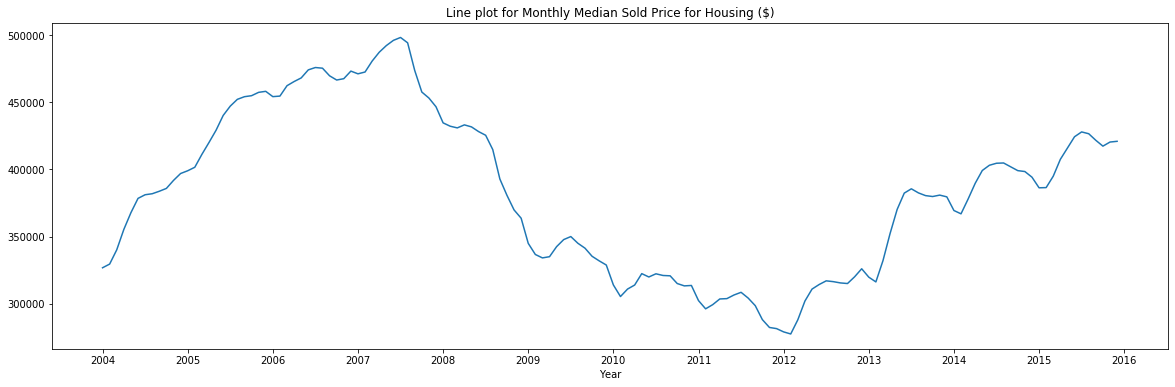

In [6]:
target = data["MedianSoldPrice_AllHomes.California"]
plt.figure(figsize=(20,6))
plt.xticks(np.arange(0, 170, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016', '2017', '2018'))
plt.title("Line plot for Monthly Median Sold Price for Housing ($)")
pyplot.xlabel('Year')
pyplot.plot(target)
pyplot.show()

In [7]:
X = data['MedianSoldPrice_AllHomes.California'].dropna(); X

0      326752.55
1      329501.50
2      340125.45
3      355329.50
4      367818.15
         ...    
139    426650.00
140    421750.00
141    417400.00
142    420450.00
143    421000.00
Name: MedianSoldPrice_AllHomes.California, Length: 144, dtype: float64

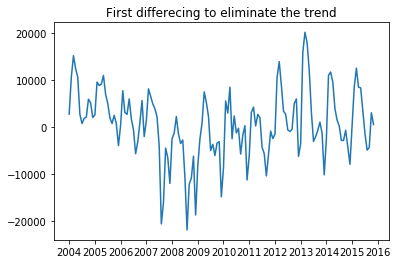

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
#first differecing the trend
d1 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    d1.append(value)

plt.title('First differecing to eliminate the trend')
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(d1) 
pyplot.show()

adf_test(d1)

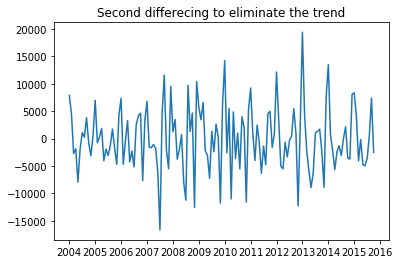

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
#second differecing the trend
d2 = list()
for i in range(1, len(d1)):
    value = d1[i] - d1[i - 1]
    d2.append(value)

plt.title('Second differecing to eliminate the trend')
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(d2) 
pyplot.show()

adf_test(d2)

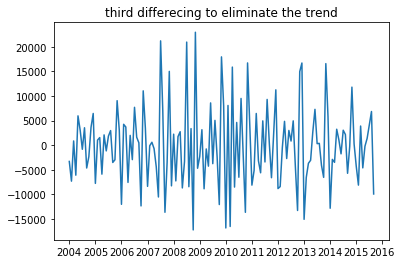

Results of Dickey-Fuller Test:
Test Statistic                -7.368268e+00
p-value                        9.114125e-11
#Lags Used                     1.400000e+01
Number of Observations Used    1.260000e+02
Critical Value (1%)           -3.483346e+00
Critical Value (5%)           -2.884766e+00
Critical Value (10%)          -2.579156e+00
dtype: float64


In [10]:
#third differecing the trend
d3 = list()
for i in range(1, len(d2)):
    value = d2[i] - d2[i - 1]
    d3.append(value)

plt.title('third differecing to eliminate the trend')
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(d3) 
pyplot.show()

adf_test(d3)

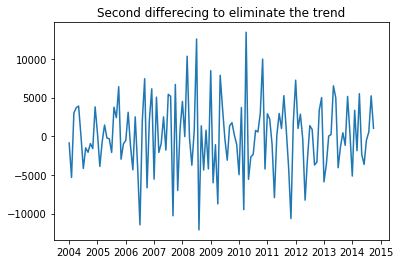

Results of Dickey-Fuller Test:
Test Statistic                  -5.149454
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [11]:
#first differecing the seasonality with d=2
s1 = list()
for i in range(12, len(d2)):
    value = d2[i] - d2[i - 12]
    s1.append(value)

plt.title('Second differecing to eliminate the trend')
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(s1) 
pyplot.show()

adf_test(s1)

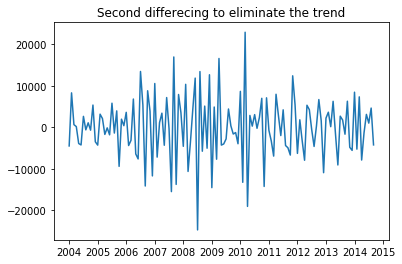

In [12]:
#first differecing the seasonality with d=3 
s1_1 = list()
for i in range(12, len(d3)):
    value = d3[i] - d3[i - 12]
    s1_1.append(value)

plt.title('Second differecing to eliminate the trend')
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(s1_1) 
pyplot.show()

#()adf_test(s1_1)

In [13]:
#(d,D,m)

#possible (2, 1, 12), (3, 1, 12), (2, 2, 12), (3, 2, 12) 

In [14]:
train_size = int(len(X) * 0.8)
train, test = data['MedianSoldPrice_AllHomes.California'][0:train_size].dropna(), data['MedianSoldPrice_AllHomes.California'][train_size:].dropna()
forecast = data['MedianSoldPrice_AllHomes.California'][144:174]


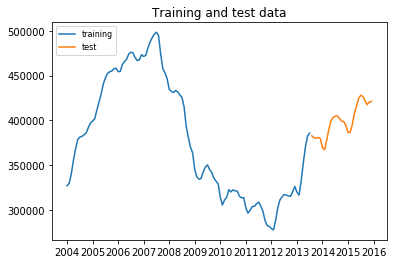

In [15]:
plt.title("Training and test data")
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
#(2, 1, 12)
model_1 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
# print(model_1.summary())
fitted_1 = model_1.fit(train)
fc_1, conf_1 = fitted_1.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_1 = pd.Series(fc_1, index=test.index)
lower_series_1 = pd.Series(conf_1[:, 0], index=test.index)
upper_series_1 = pd.Series(conf_1[:, 1], index=test.index)

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1997.725, BIC=2010.800, Fit time=0.725 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=2009.374, BIC=2014.604, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=2013.021, BIC=2023.482, Fit time=0.130 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=2013.214, BIC=2023.674, Fit time=0.204 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 1, 12); AIC=1997.765, BIC=2013.456, Fit time=1.093 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1995.624, BIC=2006.084, Fit time=0.409 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=2011.389, BIC=2019.235, Fit time=0.039 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1997.604, BIC=2010.679, Fit time=0.336 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=2011.192, BIC=2019.038, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 2) s

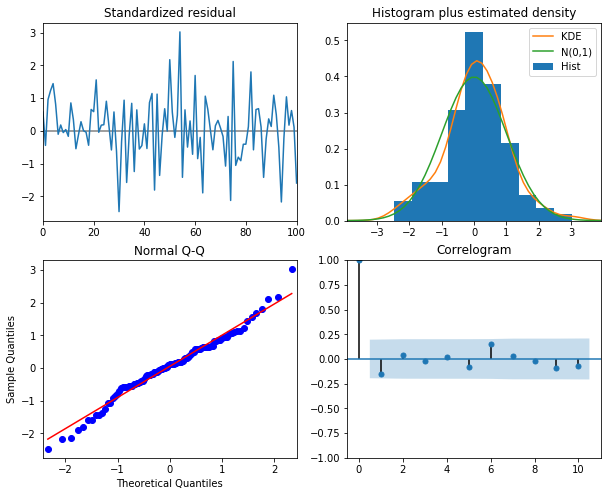

In [17]:
model_1.plot_diagnostics(figsize=(10,8))
plt.show()

In [18]:
mse_1 = ((fc_series_1 - test) ** 2).mean()
rmse_1 =round(np.sqrt(mse_1), 2)
print(rmse_1)

230220.3


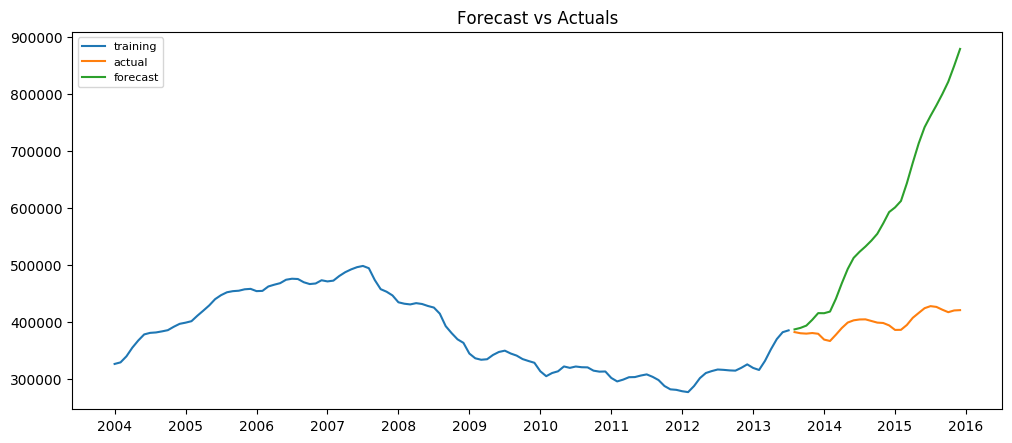

In [19]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_1, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
#(3, 1, 12)
model_2 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=3, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
# print(model_1.summary())
fitted_2 = model_2.fit(train)
fc_2, conf_2 = fitted_2.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_2 = pd.Series(fc_2, index=test.index)
# lower_series_2 = pd.Series(conf_2[:, 0], index=test.index)
# upper_series_2 = pd.Series(conf_2[:, 1], index=test.index)

Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 1, 1, 12); AIC=2004.252, BIC=2017.278, Fit time=0.309 seconds
Fit ARIMA: order=(0, 3, 0) seasonal_order=(0, 1, 0, 12); AIC=2084.132, BIC=2089.342, Fit time=0.014 seconds
Fit ARIMA: order=(1, 3, 0) seasonal_order=(1, 1, 0, 12); AIC=2096.682, BIC=2107.103, Fit time=0.146 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(0, 1, 1, 12); AIC=2000.482, BIC=2010.903, Fit time=0.447 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 1, 12); AIC=1997.728, BIC=2010.754, Fit time=0.885 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 0, 12); AIC=2006.556, BIC=2016.977, Fit time=0.157 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 2, 12); AIC=2004.765, BIC=2020.396, Fit time=1.836 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(0, 1, 0, 12); AIC=1995.419, BIC=2003.234, Fit time=0.099 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 1, 0, 12); AIC=1995.679, BIC=2006.100, Fit time=0.207 seconds
Fit ARIMA: order=(0, 3, 2) s

In [21]:
len(test)

29

In [22]:
test.index

Int64Index([115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
            128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
            141, 142, 143],
           dtype='int64')

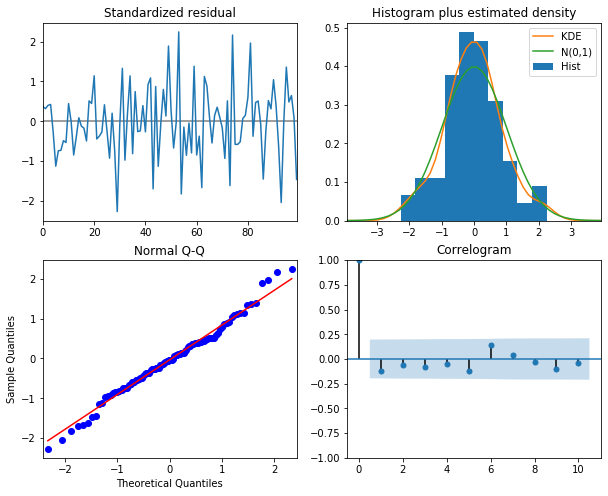

In [23]:
model_2.plot_diagnostics(figsize=(10,8))
plt.show()

In [24]:
mse_2 = ((fc_series_2 - test) ** 2).mean()
rmse_2 =round(np.sqrt(mse_2), 2)
print(rmse_2)

49459.73


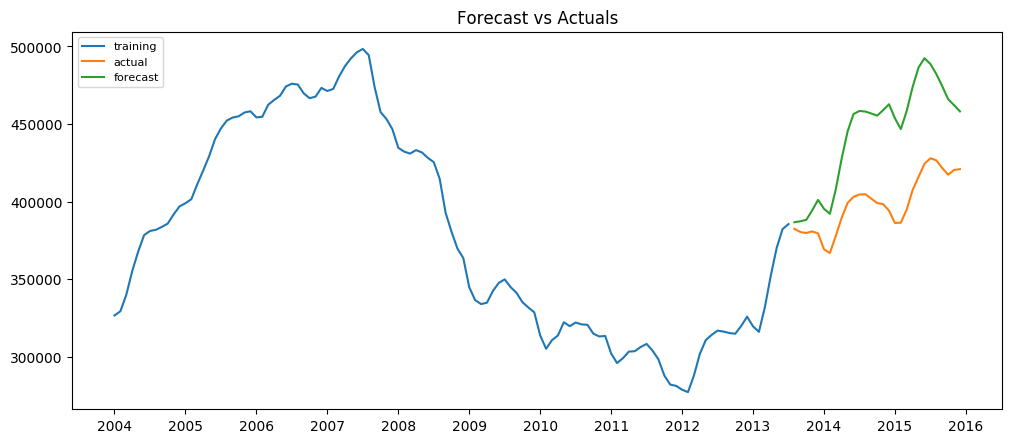

In [25]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_2, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [26]:

ignore_size = int(len(X) * 0.33)
ignore_2 = data['MedianSoldPrice_AllHomes.California'][:ignore_size]
train_2 = data['MedianSoldPrice_AllHomes.California'][ignore_size:].dropna()
forecast = data['MedianSoldPrice_AllHomes.California'][144:174]

In [27]:
#define the model with (3, 1, 12) and fit the data
model_fc = pm.auto_arima(train_2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=3, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
# print(model_1.summary())
fitted_fc = model_fc.fit(train_2)
fc_fc, conf_fc = fitted_fc.predict(len(forecast),return_conf_int=True,alpha=0.05)
fc_series_fc = pd.Series(fc_fc, index=forecast.index)

Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 1, 1, 12); AIC=1645.801, BIC=1657.835, Fit time=0.344 seconds
Fit ARIMA: order=(0, 3, 0) seasonal_order=(0, 1, 0, 12); AIC=1704.523, BIC=1709.337, Fit time=0.009 seconds
Fit ARIMA: order=(1, 3, 0) seasonal_order=(1, 1, 0, 12); AIC=1712.033, BIC=1721.660, Fit time=0.096 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(0, 1, 1, 12); AIC=1645.629, BIC=1655.256, Fit time=0.213 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 1, 12); AIC=1644.039, BIC=1656.073, Fit time=0.370 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 0, 12); AIC=1645.652, BIC=1655.279, Fit time=0.155 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(1, 1, 2, 12); AIC=1646.008, BIC=1660.448, Fit time=2.002 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(0, 1, 0, 12); AIC=1636.281, BIC=1643.501, Fit time=0.087 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 1, 0, 12); AIC=1639.997, BIC=1649.624, Fit time=0.181 seconds
Fit ARIMA: order=(0, 3, 2) s

In [28]:
#forecasting 2016-2017 
fc_fc, conf_fc = fitted_fc.predict(len(forecast),return_conf_int=True, alpha=0.05)
forcast_2016_17 = pd.Series(fc_fc, index=forecast.index)

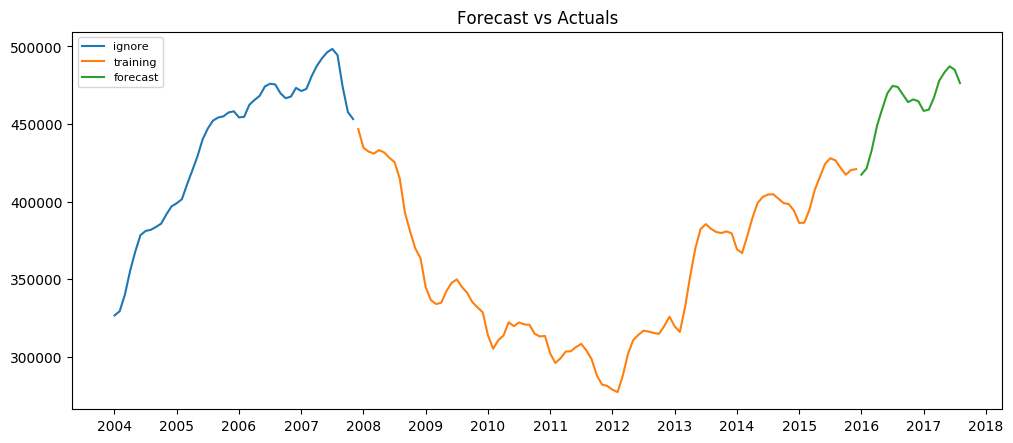

In [29]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 170, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016', '2017', '2018'))
plt.plot(ignore_2, label='ignore')
plt.plot(train_2, label='training')
plt.plot(forcast_2016_17, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [30]:
#(2, 2, 12)
model_3 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
# print(model_1.summary())
fitted_3 = model_3.fit(train)
fc_3, conf_3 = fitted_3.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_3 = pd.Series(fc_3, index=test.index)
lower_series_3 = pd.Series(conf_3[:, 0], index=test.index)
upper_series_3 = pd.Series(conf_3[:, 1], index=test.index)

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1786.789, BIC=1799.232, Fit time=1.208 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=1858.671, BIC=1863.649, Fit time=0.040 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=1861.609, BIC=1871.563, Fit time=0.244 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1787.595, BIC=1797.549, Fit time=1.316 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=1809.877, BIC=1824.809, Fit time=1.487 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 0, 12); AIC=1842.755, BIC=1852.709, Fit time=0.406 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 2, 2, 12); AIC=1810.096, BIC=1825.027, Fit time=2.017 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 2, 12); AIC=1813.069, BIC=1830.489, Fit time=2.814 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1784.096, BIC=1799.028, Fit time=1.579 seconds
Fit ARIMA: order=(2, 2, 0) s

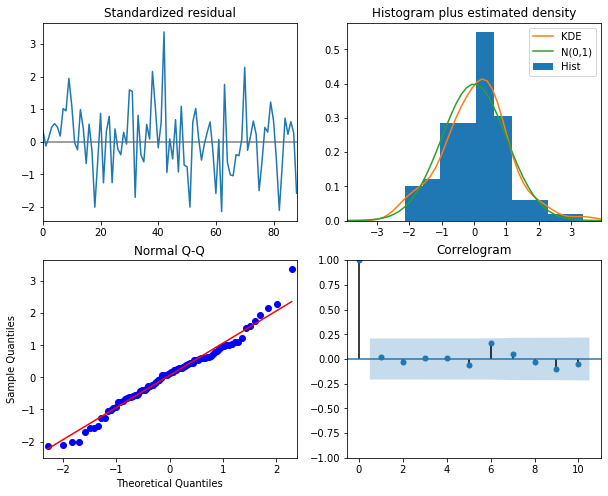

In [31]:
model_3.plot_diagnostics(figsize=(10,8))
plt.show()

In [32]:
mse_3 = ((fc_series_3 - test) ** 2).mean()
rmse_3 =round(np.sqrt(mse_3), 2)
print(rmse_3)

248472.53


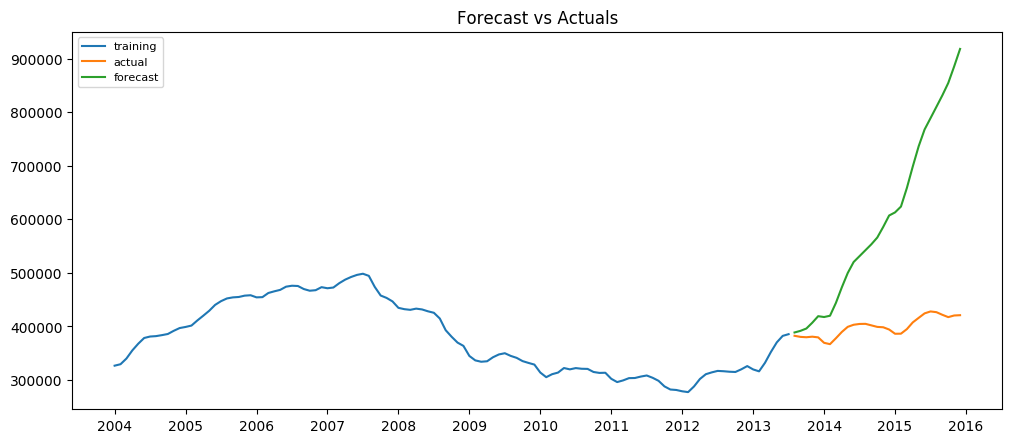

In [33]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016'))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series_3, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [34]:
#(3, 2, 12)
model_4 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=3, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
# print(model_1.summary())
fitted_4 = model_4.fit(train)
fc_4, conf_4 = fitted_4.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series_4 = pd.Series(fc_4, index=test.index)
lower_series_4 = pd.Series(conf_4[:, 0], index=test.index)
upper_series_4 = pd.Series(conf_4[:, 1], index=test.index)

Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 2, 1, 12); AIC=1782.229, BIC=1794.616, Fit time=1.676 seconds
Fit ARIMA: order=(0, 3, 0) seasonal_order=(0, 2, 0, 12); AIC=1926.847, BIC=1931.802, Fit time=0.021 seconds
Fit ARIMA: order=(1, 3, 0) seasonal_order=(1, 2, 0, 12); AIC=1931.408, BIC=1941.318, Fit time=0.234 seconds
Fit ARIMA: order=(0, 3, 1) seasonal_order=(0, 2, 1, 12); AIC=1784.323, BIC=1794.232, Fit time=1.518 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(1, 2, 1, 12); AIC=1783.448, BIC=1798.312, Fit time=1.898 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 2, 0, 12); AIC=1832.497, BIC=1842.406, Fit time=0.445 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(0, 2, 2, 12); AIC=1815.540, BIC=1830.404, Fit time=3.306 seconds
Fit ARIMA: order=(1, 3, 1) seasonal_order=(1, 2, 2, 12); AIC=1820.286, BIC=1837.627, Fit time=9.459 seconds
Fit ARIMA: order=(2, 3, 1) seasonal_order=(0, 2, 1, 12); AIC=1814.897, BIC=1829.761, Fit time=2.525 seconds
Fit ARIMA: order=(1, 3, 0) s

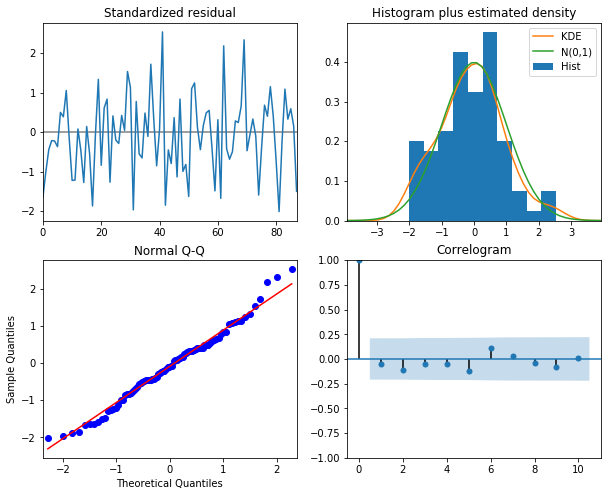

In [35]:
model_4.plot_diagnostics(figsize=(10,8))
plt.show()

In [36]:
mse_4 = ((fc_series_4 - test) ** 2).mean()
rmse_4 =round(np.sqrt(mse_4), 2)
print(rmse_4)

89461.25


# VAR modeling

In [37]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [38]:
data.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [39]:
data_2009 = data[60:]
data_2009.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
60,2009-01-31,344951.50,4.72,7.8,NaN
61,2009-02-28,336652.55,4.77,8.3,NaN
62,2009-03-31,334101.50,4.64,8.8,NaN
63,2009-04-30,335000.45,4.50,8.5,NaN
64,2009-05-31,342500.00,4.52,8.7,NaN


In [40]:
data_VAR = data_2009[['MedianSoldPrice_AllHomes.California','MedianMortageRate','UnemploymentRate']]

In [106]:
fc_df = data[144:]

In [87]:
series_VAR=data_VAR.dropna()
train_VAR = series_VAR
test_VAR = series_VAR[int(0.80*(len(series_VAR))):]
train_VAR.tail()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
139,426650.0,3.87,5.1
140,421750.0,3.80,5.0
141,417400.0,3.69,5.0
142,420450.0,3.89,5.1
143,421000.0,3.91,5.0


In [88]:
test_VAR

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
127,404850.0,4.06,7.5
128,402000.0,4.19,6.3
129,399150.0,4.03,6.0
130,398475.0,3.90,6.2
131,394275.0,3.85,6.2
132,386350.0,3.89,5.7
133,386500.0,3.91,5.5
134,395000.0,3.79,5.4
135,407550.0,3.73,5.4
136,416050.0,3.85,5.6


In [90]:
model_VAR = VAR(endog=train_VAR)
model_VAR_fit = model_VAR.fit(1)
print(model_VAR_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2019
Time:                     23:09:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    12.8274
Nobs:                     83.0000    HQIC:                   12.6182
Log likelihood:          -859.142    FPE:                    262488.
AIC:                      12.4777    Det(Omega_mle):         227922.
--------------------------------------------------------------------
Results for equation MedianSoldPrice_AllHomes.California
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                       1725.736379     12710.483287            0.136           0.892
L1.MedianSoldPrice_AllHomes.Californ

/Users/esmeluo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [125]:
validation_VAR = series_VAR[:int(0.80*(len(series_VAR)))].to_numpy()

In [127]:
fc_test_VAR = model_VAR_fit.forecast(validation_VAR, steps=len(test_VAR))
cols = ['MedianSoldPrice_AllHomes','MedianMortageRate','UnemploymentRate']
pred_test = pd.DataFrame(index=test_VAR.index,columns=[cols])
for j in range(0,3):
    for i in range(0, len(fc_test_VAR)):
       pred_test.iloc[i][j] = float(fc_test_VAR[i][j])

In [108]:
fc_VAR = model_VAR_fit.forecast(model_VAR_fit.y, steps=len(fc_df))
cols = ['MedianSoldPrice_AllHomes','MedianMortageRate','UnemploymentRate']
pred = pd.DataFrame(index=fc_df.index,columns=[cols])
for j in range(0,3):
    for i in range(0, len(fc_VAR)):
       pred.iloc[i][j] = float(fc_VAR[i][j])

In [135]:
fc_test = pred_test.drop(['MedianMortageRate','UnemploymentRate'],axis = 1).squeeze()

In [110]:
fc_var = pred.drop(['MedianMortageRate','UnemploymentRate'],axis = 1).squeeze()

In [102]:
ignore = data['MedianSoldPrice_AllHomes.California'][:60]

In [100]:
train_VAR = train_VAR.drop(['MedianMortageRate','UnemploymentRate'],axis = 1).squeeze()

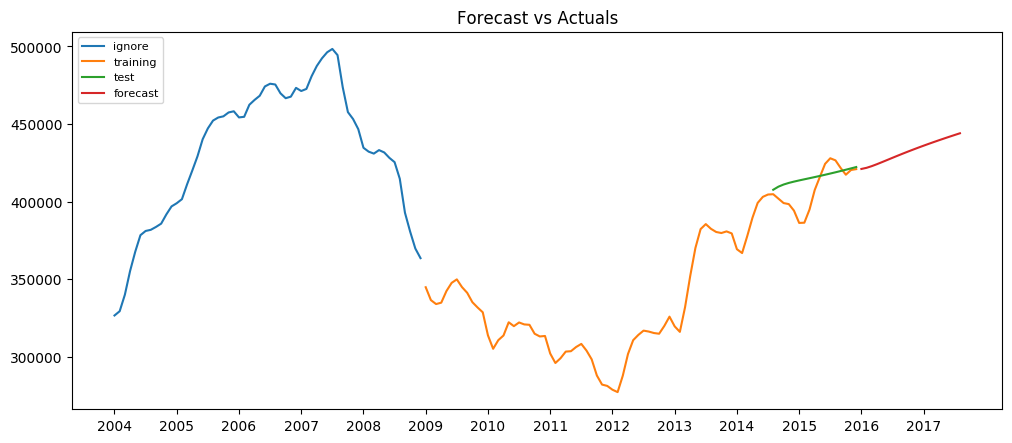

In [136]:
plt.figure(figsize=(12,5), dpi=100)
plt.xticks(np.arange(0, 163, step=12), ('2004', '2005', '2006', 
                                        '2007', '2008', '2009', 
                                        '2010', '2011', '2012', 
                                        '2013', '2014', '2015', '2016','2017'))
plt.plot(ignore, label='ignore')
plt.plot(train_VAR, label='training')
plt.plot(fc_test, label='test')
#plt.plot(test, label='test')
plt.plot(fc_var, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [156]:
test_np = test_VAR.drop(['MedianMortageRate','UnemploymentRate'],axis = 1).to_numpy().flatten()
fc = np.array([x[0] for x in fc_test_VAR])
rmse_VAR =round(np.sqrt((test_np-fc)**2).mean(),2)
print(rmse_VAR)

10077.02


In [140]:
len(test)

29

In [157]:
model_VAR_fit.coefs_exog

array([[1.72573638e+03],
       [1.08447190e-01],
       [2.72859064e+00]])

In [159]:
model_VAR_fit.long_run_effects()

array([[ 2.47636029e+02, -1.06070356e+07,  5.06607742e+05],
       [ 3.30919216e-04, -4.63788480e+00,  1.57126709e+00],
       [-3.76551829e-03,  1.75430279e+02, -3.79621961e+00]])

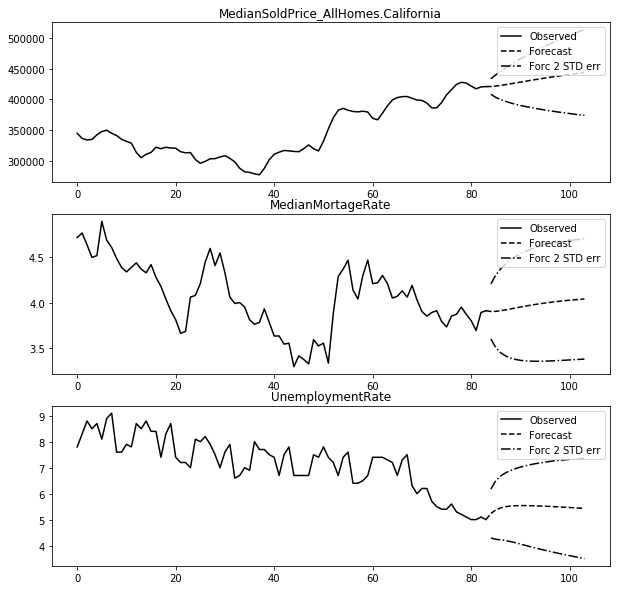

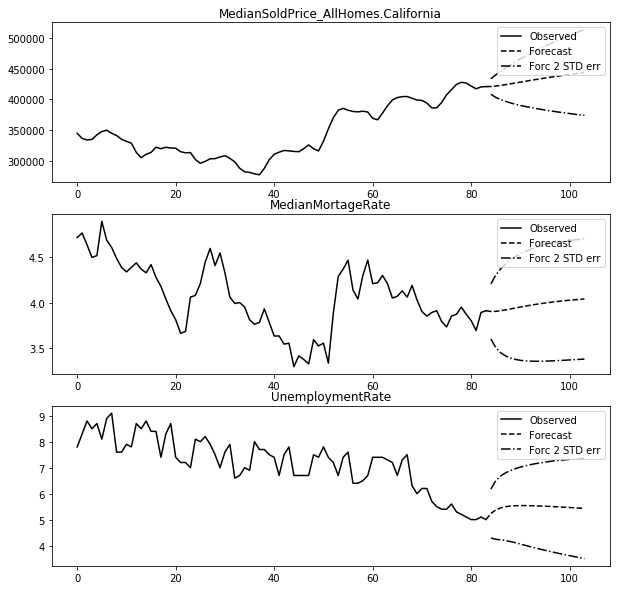

In [162]:
model_VAR_fit.plot_forecast(20)

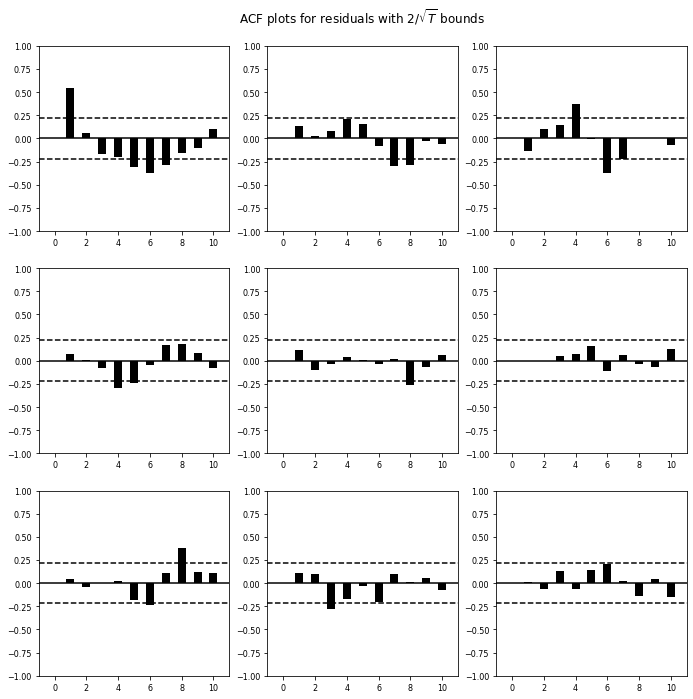

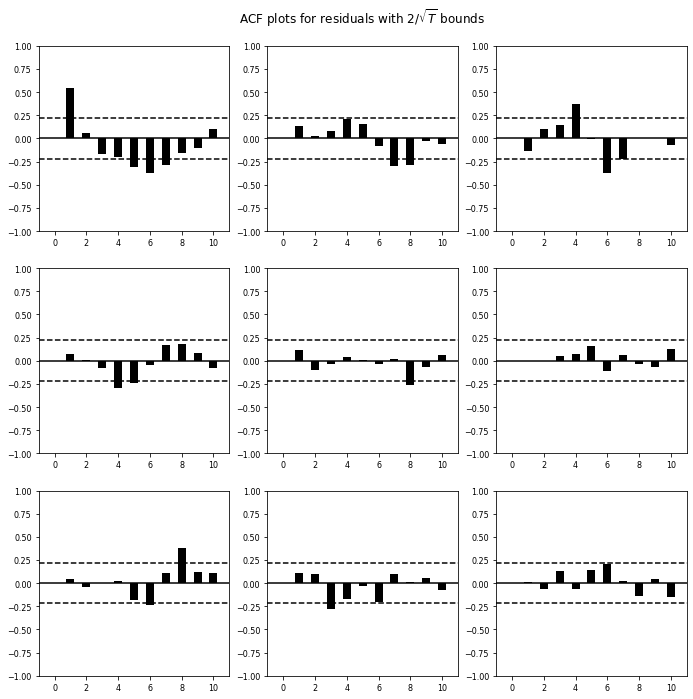

In [165]:
model_VAR_fit.plot_acorr()